In [1]:
import numpy as np
import pandas as pd #read_csv, get_dummies(원핫인코딩)
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras import metrics
from tensorflow.keras.callbacks import EarlyStopping

##  Y값이 문자 같은거면 getdummies로 원핫인코딩이 좋음

타겟변수가 될 와인 등급 종류 :  [5 6 7 4 8 3]
(1119, 11) (1119, 6) (480, 11) (480, 6)
Epoch 1/50
5/5 [==============================] - 0s 31ms/step - loss: 1.7906 - accuracy: 0.1553 - val_loss: 1.6957 - val_accuracy: 0.3080
Epoch 2/50
5/5 [==============================] - 0s 6ms/step - loss: 1.6810 - accuracy: 0.3218 - val_loss: 1.5997 - val_accuracy: 0.4241
Epoch 3/50
5/5 [==============================] - 0s 5ms/step - loss: 1.5789 - accuracy: 0.4123 - val_loss: 1.5079 - val_accuracy: 0.4420
Epoch 4/50
5/5 [==============================] - 0s 6ms/step - loss: 1.4886 - accuracy: 0.4324 - val_loss: 1.4188 - val_accuracy: 0.4420
Epoch 5/50
5/5 [==============================] - 0s 6ms/step - loss: 1.4065 - accuracy: 0.4335 - val_loss: 1.3389 - val_accuracy: 0.4464
Epoch 6/50
5/5 [==============================] - 0s 6ms/step - loss: 1.3297 - accuracy: 0.4346 - val_loss: 1.2733 - val_accuracy: 0.4509
Epoch 7/50
5/5 [==============================] - 0s 6ms/step - loss: 1.2700 - accuracy: 0.4436 -

Text(0, 0.5, 'accuracy')

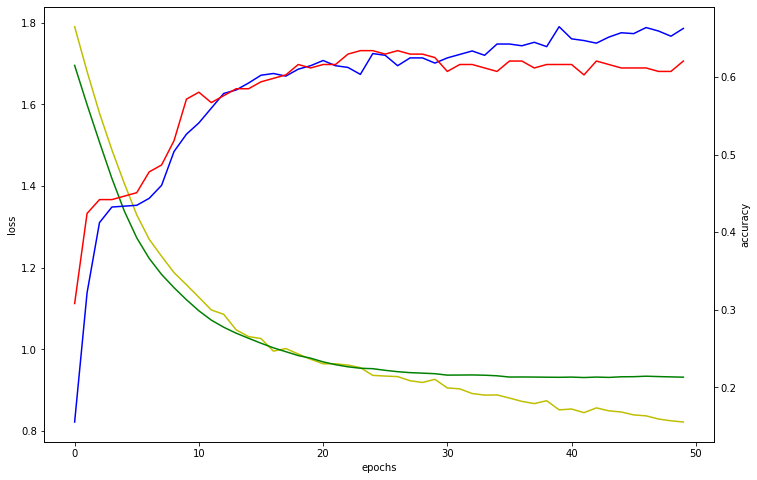

In [4]:
# 1. 데이터 셋 준비하기
redwine = pd.read_csv('data/winequality-red.csv', sep=';')
redwine_x = redwine.iloc[:,:-1].to_numpy()
redwine_y = redwine.iloc[:,-1]
print('타겟변수가 될 와인 등급 종류 : ', redwine_y.unique())

# 2. 독립변수 scale 조정
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(redwine_x)
redwine_x = scaler.transform(redwine_x)

# 3. 타겟변수 원핫인코딩(라벨링 전환) 후 numpy 배열로 변환
redwine_y = pd.get_dummies(redwine_y).to_numpy()

# 훈련셋과 테스트셋 분리 (7:3)
train_X, test_X, train_Y, test_Y = train_test_split(redwine_x, redwine_y, test_size=0.3, random_state=1)
print(train_X.shape, train_Y.shape, test_X.shape, test_Y.shape)

# 4. 모델 구성하기
model=Sequential()
model.add(Input(11)) # 의미있는 레이어가 아니고 input_dim만 지정
model.add(Dense(units=50, activation='relu'))
model.add(Dense(units=50, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=30, activation='relu'))
model.add(Dense(units=6, activation='softmax'))

# 5. 모델 학습과정 설정
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 6. 모델 학습시키기
earlyStopping = EarlyStopping(patience=20)
hist=model.fit(train_X, train_Y, epochs=50, batch_size=200, validation_split=0.2, callbacks=[earlyStopping])

# 7. 모델 학습과정 표시하기
import matplotlib.pyplot as plt
fig, loss_ax = plt.subplots(figsize=(12,8))
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'g', label='val loss')
loss_ax.set_xlabel('epochs')
loss_ax.set_ylabel('loss')
acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'b', label='accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'r', label='val_accuracy')
acc_ax.set_ylabel('accuracy')

In [5]:
# 8. 모델 평가하기
loss_and_acc = model.evaluate(test_X, test_Y, batch_size=32)
loss_and_acc[0], loss_and_acc[1]

15/15 [==============================] - 0s 1ms/step - loss: 0.9475 - accuracy: 0.6104


(0.947498619556427, 0.6104166507720947)

In [15]:
# 9. 성능 지표 (crosstab)
pred = model.predict(test_X).argmax(axis=1)+3
pred = np.argmax(model.predict(test_X), axis=1)+3
real = test_Y.argmax(axis=1)+3
cross_tab = pd.crosstab(real, pred)
cross_tab.index.name = 'real'
cross_tab.columns.name = 'predict'
cross_tab

predict,4,5,6,7
real,,,,
3,0,2,0,0
4,1,12,7,1
5,0,162,42,3
6,0,64,113,18
7,0,4,31,17
8,0,0,0,3


In [19]:
# 10. 모델 사용하기
input_data = np.array([7.4, 0.7 , 0, 1.9, 0.076, 11, 34, 0.9978, 3.51, 0.56, 9.4])
np.argmax(model.predict(scaler.transform(input_data.reshape(1,11))), axis=1)+3

array([5], dtype=int64)

In [23]:
a=[9,6,7]
b=pd.get_dummies(a).to_numpy()

In [24]:
a

[9, 6, 7]

In [25]:
b

array([[0, 0, 1],
       [1, 0, 0],
       [0, 1, 0]], dtype=uint8)